In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr,shapiro,f_oneway, ranksums
from scipy.special import stdtr
import csv
import pandas as pd

from scipy.integrate import quad
import sys 
import os

sys.path.append(os.path.abspath("/Users/miraliu/Desktop/PostDocCode/PartialNephrectomy_Python"))
#sys.path.append('../')
from ML_UsefulFunctions import *
from KidneyROIAnalyses import *
sys.path.append(os.path.abspath("/Users/miraliu/Desktop/PostDocCode/RenalAllograft_Python"))
from RenalAllograftFunctions import *

from scipy import special

from scipy.integrate import tplquad

pd.options.display.float_format = '{:.3f}'.format


from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.simplefilter("ignore")


from EllipsoidalSimulationCode import *
from matplotlib import cm

In [2]:
fileloc = '/Users/miraliu/Desktop/Projects/Manuscripts/MultiExp_IVIM/Neural_ContinuousSpectra_ROIs.xlsx'

#with extended diffusion spectrum 
#fileloc = '/Users/miraliu/Desktop/Projects/Manuscripts/MultiExp_IVIM/Neural_ContinuousSpectra_ROIs2.xlsx'

Data = pd.read_excel(fileloc,sheet_name = 'Spectra') 

In [3]:
CSF = Data.loc[(Data['ROI Classification'] == 'CSF')]
GM = Data.loc[(Data['ROI Classification'] == 'GM')]
WM = Data.loc[(Data['ROI Classification'] == 'WM')]
Infarct = Data.loc[(Data['ROI Classification'] == 'Infarct_mask')]

def splitStates(df):
    df_base = df.loc[(df['state'] == 'baseline')]
    df_hype = df.loc[(df['state'] == 'hypercap')]
    df_mcao = df.loc[(df['state'] == 'pmcao')]
    return df_base, df_hype, df_mcao

CSF_base, CSF_hype, CSF_mcao = splitStates(CSF)
GM_base, GM_hype, GM_mcao = splitStates(GM)
WM_base, WM_hype, WM_mcao = splitStates(WM)


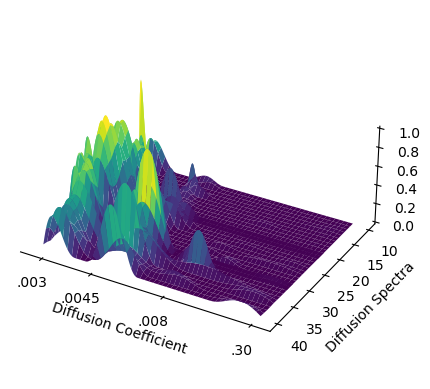

In [4]:
test = CSF_base.iloc[:,5:].to_numpy()/np.max(CSF_base.iloc[:,5:].to_numpy())
ny,nx = np.shape(test)
x,y = range(nx), range(30,30+ny)
X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
hf = pl.figure()
ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, test,cmap=cm.viridis)

test = GM_base.iloc[:,5:].to_numpy()/np.max(GM_base.iloc[:,5:].to_numpy())
ny,nx = np.shape(test)
x,y = range(nx), range(20,20+ny)
X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
#hf = pl.figure()
#ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, test,cmap=cm.viridis)

test = WM_base.iloc[:,5:].to_numpy()/np.max(WM_base.iloc[:,5:].to_numpy())
ny,nx = np.shape(test)
x,y = range(nx), range(10, 10+ny)
X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
#hf = pl.figure()
#ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, test,cmap=cm.viridis)

#test = Infarct.iloc[:,5:].to_numpy()/np.max(Infarct.iloc[:,5:].to_numpy())
#ny,nx = np.shape(test)
#x,y = range(nx), range(ny)
#X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
#hf = pl.figure()
#ha = hf.add_subplot(111, projection='3d')
#ha.plot_surface(X, Y, test,cmap=cm.Wistia)

ha.set_box_aspect(aspect=(2.5, 2, 1)) #changing aspect ratio
ha.view_init(elev=30., azim=120) #changing angle and elevation height
pl.xlabel('Diffusion Coefficient')
pl.ylabel('Diffusion Spectra')
#pl.zlabel('Intensity')
pl.xticks([3, 120, 220, 290], ['.30', '.008', '.0045', '.003'])

# make axes invisible
# make the panes transparent
ha.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ha.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ha.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ha.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ha.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ha.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
pl.savefig('/Users/miraliu/Desktop/test.png',dpi = 1000)
pl.show()

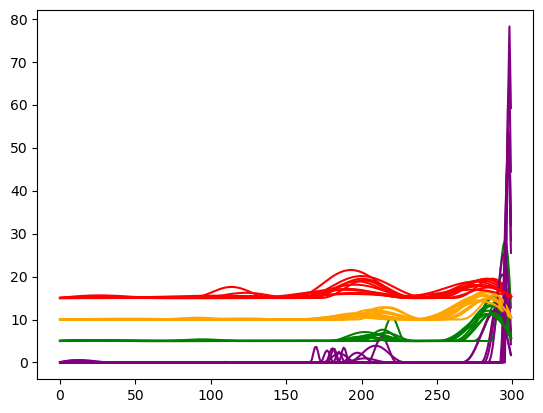

In [5]:
WM_basedata =WM_base.iloc[:,5:].to_numpy()
GM_basedata =GM_base.iloc[:,5:].to_numpy()
CSF_basedata =CSF_base.iloc[:,5:].to_numpy()
Infarct_basedata =Infarct.iloc[:,5:].to_numpy()

#normalize to max peak for simplicity
#WM_basedata = WM_basedata/np.max(WM_basedata)
#GM_basedata = GM_basedata/np.max(GM_basedata)
#CSF_basedata = CSF_basedata/np.max(CSF_basedata)
#Infarct_basedata = Infarct_basedata/np.max(Infarct_basedata)

x = range(300)
for j in range(11):
    pl.plot(x,Infarct_basedata[j],color = 'purple')
    pl.plot(x,WM_basedata[j]+5, color = 'green')
    pl.plot(x,GM_basedata[j]+10, color = 'orange')
    pl.plot(x,CSF_basedata[j]+15, color = 'red')

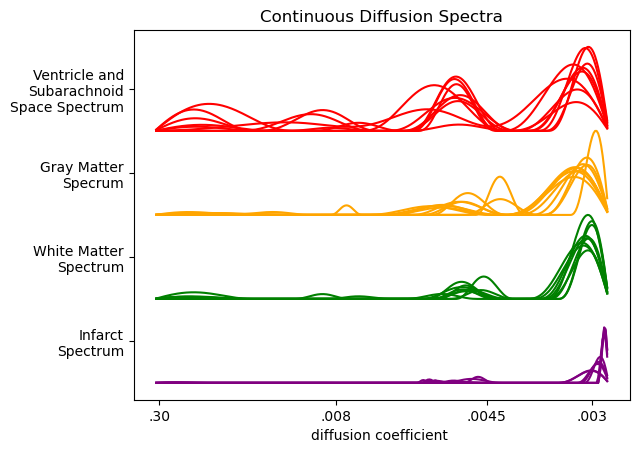

In [6]:
WM_hypedata =WM_hype.iloc[:,5:].to_numpy()
GM_hypedata =GM_hype.iloc[:,5:].to_numpy()
CSF_hypedata =CSF_hype.iloc[:,5:].to_numpy()
Infarct_hypedata =Infarct.iloc[:,5:].to_numpy()

#normalize to max peak for simplicity
WM_hypedata = WM_hypedata/np.max(WM_hypedata)
GM_hypedata = GM_hypedata/np.max(GM_hypedata)
CSF_hypedata = CSF_hypedata/np.max(CSF_hypedata)
Infarct_hypedata = Infarct_hypedata/np.max(Infarct_hypedata)



x = range(1,301)
#x = [1/i for i in x]
for j in range(9):
        pl.plot(x,Infarct_hypedata[j],color = 'purple')
        pl.plot(x,WM_hypedata[j]+1, color = 'green')
        pl.plot(x,GM_hypedata[j]+2, color = 'orange')
        pl.plot(x,CSF_hypedata[j]+3, color = 'red')

        
#pl.legend(bbox_to_anchor = [1, 0.5])
pl.title('Continuous Diffusion Spectra')
pl.xlabel('diffusion coefficient ')
pl.xticks([3, 120, 220, 290], ['.30', '.008', '.0045', '.003'])
pl.yticks([.5, 1.5, 2.5, 3.5], ['Infarct\nSpectrum', 'White Matter\nSpectrum', 'Gray Matter\nSpecrum', 'Ventricle and\nSubarachnoid\nSpace Spectrum'])
pl.show()
#pl.hlines(3,0,300,color = 'black',linestyle = '--')

# getting units correct

In [7]:
ADCBasisSteps = 310
ADCBasis = np.logspace(np.log10(5), np.log10(3200), ADCBasisSteps)
x = 1/ADCBasis

ADCBasisSteps = 300
ADCBasis = np.logspace(np.log10(5), np.log10(2200), ADCBasisSteps)
x = 1/ADCBasis

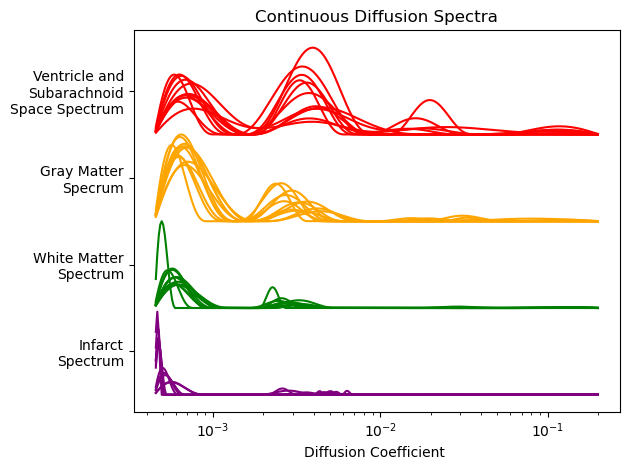

In [8]:
WM_basedata =WM_base.iloc[:,5:].to_numpy()
GM_basedata =GM_base.iloc[:,5:].to_numpy()
CSF_basedata =CSF_base.iloc[:,5:].to_numpy()
Infarct_basedata =Infarct.iloc[:,5:].to_numpy()

#normalize to max peak for simplicity
WM_basedata = WM_basedata/np.max(WM_basedata)
GM_basedata = GM_basedata/np.max(GM_basedata)
CSF_basedata = CSF_basedata/np.max(CSF_basedata)
Infarct_basedata = Infarct_basedata/np.max(Infarct_basedata)



#x = range(1,301)
#x = [1/i for i in x]
for j in range(11):
        pl.plot(x,Infarct_basedata[j],color = 'purple')
        pl.plot(x,WM_basedata[j]+1, color = 'green')
        pl.plot(x,GM_basedata[j]+2, color = 'orange')
        pl.plot(x,CSF_basedata[j]+3, color = 'red')
        pl.xscale('log', base=10)
        
#pl.legend(bbox_to_anchor = [1, 0.5])
pl.title('Continuous Diffusion Spectra')
pl.xlabel('Diffusion Coefficient ')
#pl.xticks([3, 120, 220, 290], ['.30', '.008', '.0045', '.003'])
pl.yticks([.5, 1.5, 2.5, 3.5], ['Infarct\nSpectrum', 'White Matter\nSpectrum', 'Gray Matter\nSpecrum', 'Ventricle and\nSubarachnoid\nSpace Spectrum'])
pl.tight_layout()
pl.savefig('/Users/miraliu/Desktop/test2.png',dpi = 1000)

pl.show()
#pl.hlines(3,0,300,color = 'black',linestyle = '--')

# both normocapnia and hypercapnia

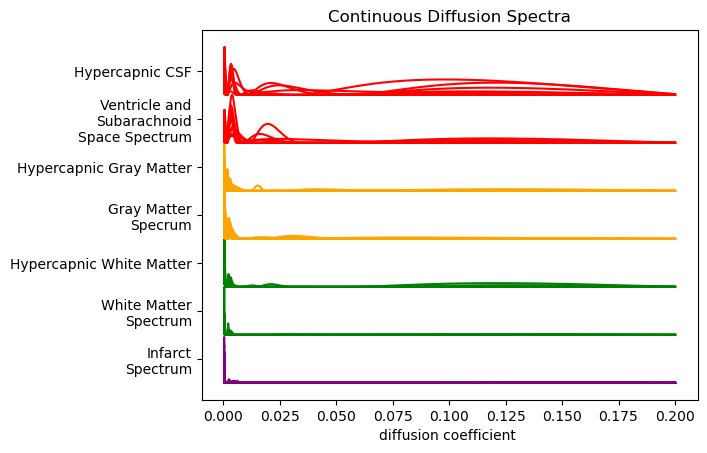

In [9]:
for j in range(9): #hypercapnia
        pl.plot(x,Infarct_hypedata[j],color = 'purple')
        pl.plot(x,WM_hypedata[j]+2, color = 'green')
        pl.plot(x,GM_hypedata[j]+4, color = 'orange')
        pl.plot(x,CSF_hypedata[j]+6, color = 'red')
        
for j in range(11): #baseline
        pl.plot(x,Infarct_basedata[j],color = 'purple')
        pl.plot(x,WM_basedata[j]+1, color = 'green')
        pl.plot(x,GM_basedata[j]+3, color = 'orange')
        pl.plot(x,CSF_basedata[j]+5, color = 'red')

       
    
pl.title('Continuous Diffusion Spectra')
pl.xlabel('diffusion coefficient ')
#pl.xticks([3, 120, 220, 290], ['.30', '.008', '.0045', '.003'])
pl.yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], ['Infarct\nSpectrum', 'White Matter\nSpectrum', 'Hypercapnic White Matter', 'Gray Matter\nSpecrum', 'Hypercapnic Gray Matter', 'Ventricle and\nSubarachnoid\nSpace Spectrum', 'Hypercapnic CSF'])
pl.show()
#pl.hlines(3,0,300,color = 'black',linestyle = '--')

# statistical significance

Manova or discriminant analysis?

In [10]:
StatData = pd.read_excel(fileloc,sheet_name = 'DataProcessed') 

In [11]:
StatData

,Case Number,Scan Name,Slice,ROI Classification,state,fast frac,med frac,slow frac,fast diff,med diff,slow diff,rsq
0,13,SE02_IVIM_sorted,19,CSF,baseline,0.013,0.524,0.463,115.344,3.607,0.664,1.000
1,14,SE03_IVIM_sorted,31,CSF,baseline,0.009,0.667,0.325,119.481,3.897,0.685,1.000
2,15,Scan 02 IVIM_sorted,21,CSF,baseline,0.127,0.427,0.446,16.357,3.731,0.732,1.000
3,16,Scan 02 IVIM_sorted,23,CSF,baseline,0.249,0.417,0.333,19.835,3.285,0.610,1.000
4,17,Scan 02 IVIM_sorted,20,CSF,baseline,0.129,0.347,0.524,28.773,4.318,0.823,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...
119,22,Scan2_sorted,23,Infarct_mask,pmcao,0.067,0.933,0.000,18.793,0.462,0.000,0.998
120,22,Scan2_sorted,26,Infarct_mask,pmcao,0.106,0.894,0.000,9.783,0.504,0.000,0.998
121,24,Scan 1_sorted,15,Infarct_mask,pmcao,0.014,0.110,0.876,140.666,4.008,0.536,1.000
122,24,Scan 1_sorted,19,Infarct_mask,pmcao,0.119,0.881,0.000,4.571,0.523,0.000,1.000


In [12]:
df = StatData.loc[(StatData['state'] == 'baseline') | ((StatData['state'] == 'pmcao') &(StatData['ROI Classification'] == 'Infarct_mask')) ]


In [13]:
from statsmodels.multivariate.manova import MANOVA

#https://support.minitab.com/en-us/minitab/20/help-and-how-to/statistical-modeling/anova/how-to/general-manova/interpret-the-results/key-results/

#https://www.geeksforgeeks.org/manova-multivariate-analysis-of-variance/

In [14]:
# Rename columns to remove spaces
df.columns = ['Case number','Scan Name','Slice','ROI_classification','state','fast_frac','med_frac','slow_frac','fast_diff', 'med_diff','slow_diff','rsq']

In [15]:
manova = MANOVA.from_formula('fast_frac + med_frac + slow_frac + fast_diff + med_diff + slow_diff ~ ROI_classification', data=df)
result = manova.mv_test()
print(result)

                               Multivariate linear model
                                                                                       
---------------------------------------------------------------------------------------
       Intercept               Value         Num DF  Den DF       F Value        Pr > F
---------------------------------------------------------------------------------------
          Wilks' lambda               0.0000 6.0000 45.0000 813903547115142.5000 0.0000
         Pillai's trace               1.0000 6.0000 45.0000 813903547115142.3750 0.0000
 Hotelling-Lawley trace 108520472948685.6562 6.0000 45.0000 813903547115142.3750 0.0000
    Roy's greatest root 108520472948685.6562 6.0000 45.0000 813903547115142.3750 0.0000
---------------------------------------------------------------------------------------
                                                                                       
---------------------------------------------------------------

# So the result would be... 
https://statistics.laerd.com/spss-tutorials/one-way-manova-using-spss-statistics-2.php

https://stats.stackexchange.com/questions/111044/post-hoc-tests-for-manova-univariate-anovas-or-discriminant-analysis

It is statistically significant. 
F(15, 127) = 26, p < 0.00005; Wilk's lambda = 0.02, 

# NOw try just CSF vs OTHER


In [16]:
# NOw try just CSF vs OTHER

def Binarize_CSF(ROI_class):
    if ROI_class == 'CSF':
        return 'CSF'
    else:
        return 'NonCSF'
    
df = StatData.loc[(StatData['state'] == 'baseline') | ((StatData['state'] == 'pmcao') &(StatData['ROI Classification'] == 'Infarct_mask')) ]
df['CSF_Binary'] = df['ROI Classification'].apply(Binarize_CSF)
# Rename columns to remove spaces
df.columns = ['Case number','Scan Name','Slice','ROI_classification','state','fast_frac','med_frac','slow_frac','fast_diff', 'med_diff','slow_diff','rsq','CSF_Binary']

In [17]:
manova = MANOVA.from_formula('fast_frac + med_frac + slow_frac + fast_diff + med_diff + slow_diff ~ CSF_Binary', data=df)
result = manova.mv_test()
print(result)

                                Multivariate linear model
                                                                                          
------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF        F Value         Pr > F
------------------------------------------------------------------------------------------
          Wilks' lambda                0.0000 6.0000 47.0000 11759399027022954.0000 0.0000
         Pillai's trace                1.0000 6.0000 47.0000 11759399027022954.0000 0.0000
 Hotelling-Lawley trace 1501199875790164.2500 6.0000 47.0000 11759399027022954.0000 0.0000
    Roy's greatest root 1501199875790164.2500 6.0000 47.0000 11759399027022952.0000 0.0000
------------------------------------------------------------------------------------------
                                                                                          
--------------------------------

# Now just trying individual feature comparison

In [18]:
from itertools import combinations
sys.path.append(os.path.abspath("/Users/miraliu/Desktop/PostDocCode/PartialNephrectomy_Python"))
#sys.path.append('../')
from ML_UsefulFunctions import *
from KidneyROIAnalyses import *
sys.path.append(os.path.abspath("/Users/miraliu/Desktop/PostDocCode/RenalAllograft_Python"))

from RenalAllograftFunctions import *

In [19]:
def Numeralize_CSF(ROI_class):
    if ROI_class == 'CSF':
        return 0
    elif ROI_class == 'GM':
        return 1
    elif ROI_class == 'WM':
        return 2
    elif ROI_class == 'Infarct_mask':
        return 3
    
df['ROI_numeralized'] = df['ROI_classification'].apply(Numeralize_CSF)


In [23]:
ParameterComparisonHead = ['parameter name', 'group 1 $\mu$','$\pm \sigma$', 'group 2 $\mu$', '$\pm \sigma$', 'p-value','wilcoxon statistic']
ParameterComparisonHead = ['parameter name', 'group 1 $\mu \pm \sigma$', 'group 2 $\mu \pm \sigma$', 'p-value']

df_list = [Run_Iterative_Utest(df, 'ROI_numeralized', i, j, ParameterComparisonHead,5,11) for i, j in combinations(df['ROI_numeralized'].unique().tolist(), 2)]
final_df = pd.concat(df_list, ignore_index = True)
#display(final_df.loc[final_df['p-value'] <.05].round(decimals = 5))

display(final_df)

,group 1,group 2,parameter name,group 1 $\mu \pm \sigma$,group 2 $\mu \pm \sigma$,p-value
0,0(11),1(13),fast_frac,0.092± 0.065,0.073± 0.101,0.259
1,0(11),1(13),med_frac,0.476± 0.129,0.364± 0.243,0.034
2,0(11),1(13),slow_frac,0.432± 0.11,0.563± 0.314,0.026
3,0(11),1(13),fast_diff,68.984± 45.796,57.449± 50.424,0.931
4,0(11),1(13),med_diff,3.84± 0.435,2.352± 0.96,0.000
5,0(11),1(13),slow_diff,0.727± 0.072,0.515± 0.285,0.010
6,0(11),2(13),fast_frac,0.092± 0.065,0.016± 0.014,0.001
7,0(11),2(13),med_frac,0.476± 0.129,0.16± 0.049,0.000
8,0(11),2(13),slow_frac,0.432± 0.11,0.824± 0.05,0.000
9,0(11),2(13),fast_diff,68.984± 45.796,117.512± 39.309,0.002


In [26]:
df

,Case number,Scan Name,Slice,ROI_classification,state,fast_frac,med_frac,slow_frac,fast_diff,med_diff,slow_diff,rsq,CSF_Binary,ROI_numeralized,fast_comp,med_comp,slow_comp
0,13,SE02_IVIM_sorted,19,CSF,baseline,0.013,0.524,0.463,115.344,3.607,0.664,1.000,CSF,0,1.488,1.889,0.308
1,14,SE03_IVIM_sorted,31,CSF,baseline,0.009,0.667,0.325,119.481,3.897,0.685,1.000,CSF,0,1.020,2.599,0.222
2,15,Scan 02 IVIM_sorted,21,CSF,baseline,0.127,0.427,0.446,16.357,3.731,0.732,1.000,CSF,0,2.082,1.592,0.326
3,16,Scan 02 IVIM_sorted,23,CSF,baseline,0.249,0.417,0.333,19.835,3.285,0.610,1.000,CSF,0,4.947,1.371,0.203
4,17,Scan 02 IVIM_sorted,20,CSF,baseline,0.129,0.347,0.524,28.773,4.318,0.823,1.000,CSF,0,3.717,1.499,0.431
5,18,Scan 02 IVIM_sorted,22,CSF,baseline,0.051,0.471,0.478,95.902,4.820,0.764,0.999,CSF,0,4.908,2.270,0.365
6,19,Scan 02 IVIM_sorted,21,CSF,baseline,0.044,0.674,0.282,110.840,3.367,0.712,1.000,CSF,0,4.927,2.269,0.201
7,20,Scan 02 IVIM_sorted,21,CSF,baseline,0.096,0.321,0.584,14.243,3.890,0.741,1.000,CSF,0,1.361,1.248,0.432
8,21,Scan 34 IVIM_sorted,24,CSF,baseline,0.121,0.324,0.555,17.377,3.932,0.867,1.000,CSF,0,2.105,1.273,0.481
9,24,Scan 2_sorted,21,CSF,baseline,0.071,0.412,0.516,107.898,4.045,0.751,1.000,CSF,0,7.683,1.668,0.388


In [29]:
# trying of f x D 

df['fast_comp'] = df.fast_frac * df.fast_diff
df['med_comp'] = df.med_frac * df.med_diff
df['slow_comp'] = df.slow_frac * df.slow_diff

ParameterComparisonHead = ['parameter name', 'group 1 $\mu \pm \sigma$', 'group 2 $\mu \pm \sigma$', 'p-value']

df_list = [Run_Iterative_Utest(df, 'ROI_numeralized', i, j, ParameterComparisonHead,14,17) for i, j in combinations(df['ROI_numeralized'].unique().tolist(), 2)]
final_df = pd.concat(df_list, ignore_index = True)
display(final_df.loc[final_df['p-value'] <.05].round(decimals = 5))

#display(final_df)

,group 1,group 2,parameter name,group 1 $\mu \pm \sigma$,group 2 $\mu \pm \sigma$,p-value
0,0(11),1(13),fast_comp,4.119± 2.946,1.532± 1.289,0.004
1,0(11),1(13),med_comp,1.805± 0.442,0.64± 0.147,0.000
3,0(11),2(13),fast_comp,4.119± 2.946,1.589± 1.06,0.012
4,0(11),2(13),med_comp,1.805± 0.442,0.438± 0.104,0.000
5,0(11),2(13),slow_comp,0.32± 0.105,0.496± 0.054,0.000
6,0(11),3(17),fast_comp,4.119± 2.946,1.76± 1.962,0.015
7,0(11),3(17),med_comp,1.805± 0.442,0.427± 0.11,0.000
10,1(13),2(13),med_comp,0.64± 0.147,0.438± 0.104,0.003
13,1(13),3(17),med_comp,0.64± 0.147,0.427± 0.11,0.001
17,2(13),3(17),slow_comp,0.496± 0.054,0.241± 0.23,0.001


# now logistic regression?

In [21]:
df_list = [Run_Iterative_LogisticRegYouden(df, 'ROI_numeralized', i, j, ParameterComparisonHead,6,11) for i, j in combinations(df['ROI_numeralized'].unique().tolist(), 2)]


group 1: 0(11)
group 2: 1(13)
['med_frac', 'slow_frac', 'med_diff', 'slow_diff']
95% AUC CI: 0.99 [0.97362372 1.        ]
[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
sensitivity:  0.91 
specificity:  0.92 
Youden J stat: 0.587
---------------------------------------
group 1: 0(11)
group 2: 2(13)
['med_frac', 'slow_frac', 'fast_diff', 'med_diff', 'slow_diff']
95% AUC CI: 1.00 [nan nan]
[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
sensitivity:  0.91 
specificity:  1.00 
Youden J stat: 0.606
---------------------------------------
group 1: 0(11)
group 2: 3(17)
['med_diff', 'slow_diff']
95% AUC CI: 0.82 [0.66331093 0.98374789]
[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1]
sensitivity:  0.91 
specificity:  0.65 
Youden J stat: 0.535
---------------------------------------
group 1: 1(13)
group 2: 2(13)
['med_frac'

# and now LDA???


But way fewer cases...... issue regarding having done the spectra on the average of the ROIs, rather than every single one? 